# K Means Clustering on Customers showing data

* Project: Segmenting Customers based on Annual Income and spending score
* Project Scope: Segmenting Customers based on Annual Income and spending score
* Data source: customers.csv
* The data contains the following columns:
    * 'Customer ID': Customer id
    * 'Gender': Gender of the user
    * 'Age': Age of the user
    * 'Annual Income': Estimated Annual Income of the Customer
    * 'Spending Score': Spending Score given by the retailer

In [1]:
# Import Data Analysis libraries
import pandas as pd
import numpy as np

# Import Data Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For display in notebook
%matplotlib inline

# Load data
dataset = pd.read_csv('customers.csv')

## Lets check the data

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


* We can see there are 5 Columns and its datatypes:
* There are 200 rows/training examples (m)

In [3]:
# Checking for null columns
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

we see that there are no null data in any columns

In [4]:
# lets check the data
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Let's analyze and visualize data
Since we are interested in  Annual Income of the customer and respective spending scores. Lets analyze them

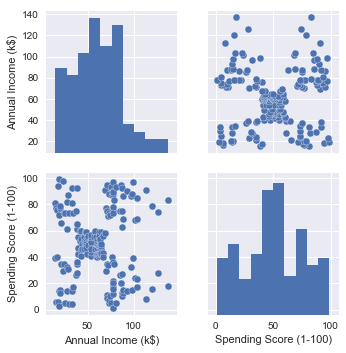

In [7]:
sns.pairplot(dataset[['Annual Income (k$)','Spending Score (1-100)']])
plt.show()

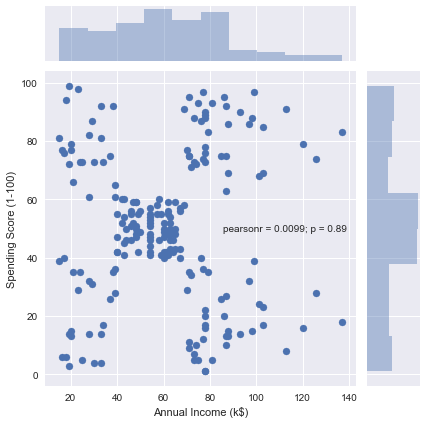

In [5]:
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=dataset)
plt.show()

At first glance, we can notice that 40-50k salary range customer have spending score not two high or low. Rest all have spending score all over the place. lets apply model to segment them out 

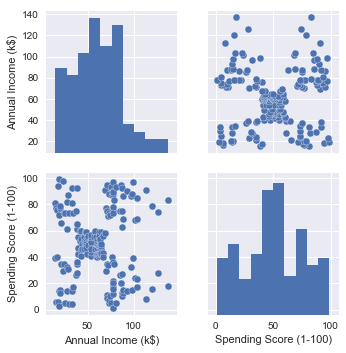

In [9]:
# Lets get 'Annual Income (k$)' & 'Spending Score (1-100)' features
X = dataset.iloc[:, [3, 4]].values

## Finding Optimal number of Clusters

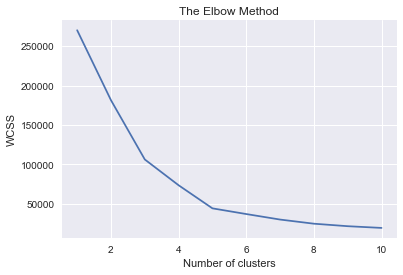

In [10]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Fitting K-Means to the dataset

In [11]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
clust_kmeans = kmeans.fit_predict(X)

In [22]:
dataset['cluster'] = clust_kmeans

## Visualising the clusters

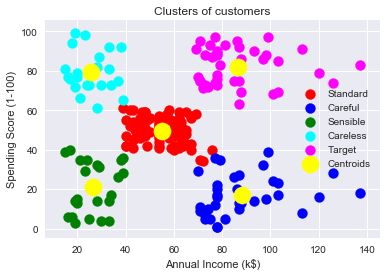

In [19]:
plt.scatter(X[clust_kmeans == 0, 0], X[clust_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard')
plt.scatter(X[clust_kmeans == 1, 0], X[clust_kmeans == 1, 1], s = 100, c = 'blue', label = 'Careful')
plt.scatter(X[clust_kmeans == 2, 0], X[clust_kmeans == 2, 1], s = 100, c = 'green', label = 'Sensible')
plt.scatter(X[clust_kmeans == 3, 0], X[clust_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[clust_kmeans == 4, 0], X[clust_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Target')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

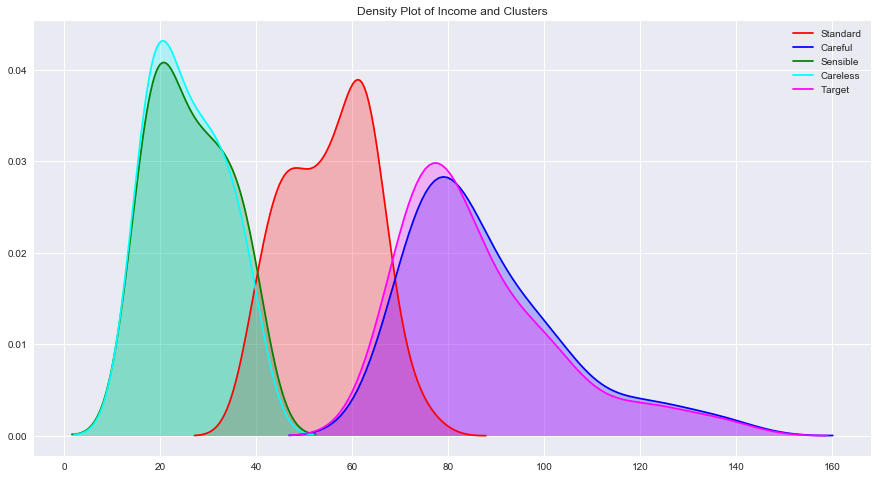

In [50]:
plt.figure(figsize=(15,8))
sns.kdeplot(dataset["Annual Income (k$)"][dataset.cluster == 0], color="red", shade=True)
sns.kdeplot(dataset["Annual Income (k$)"][dataset.cluster == 1], color="blue", shade=True)
sns.kdeplot(dataset["Annual Income (k$)"][dataset.cluster == 2], color="green", shade=True)
sns.kdeplot(dataset["Annual Income (k$)"][dataset.cluster == 3], color="cyan", shade=True)
sns.kdeplot(dataset["Annual Income (k$)"][dataset.cluster == 4], color="magenta", shade=True)
plt.legend(['Standard', 'Careful','Sensible','Careless','Target'])
plt.title('Density Plot of Income and Clusters')
plt.xlabel='Income'
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(clust_kmeans,kmeans.labels_))
print(classification_report(clust_kmeans,kmeans.labels_))

[[81  0  0  0  0]
 [ 0 35  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 22  0]
 [ 0  0  0  0 39]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        81
          1       1.00      1.00      1.00        35
          2       1.00      1.00      1.00        23
          3       1.00      1.00      1.00        22
          4       1.00      1.00      1.00        39

avg / total       1.00      1.00      1.00       200



When performing K means clusting with training and test data, we can evaluate the cluster performance by using homogeneity score
from sklearn.metrics.cluster import homogeneity_score
homogeneity_score(X_test, X_pred)